# Unit 5 - Financial Planning

In [91]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [92]:
# Load .env enviroment variables
load_dotenv()

True

In [93]:
True

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [94]:
# Set monthly household income
monthly_income = 12000

In [95]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [96]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [97]:
# Fetch current BTC price
btc_price = requests.get(btc_url)
btc_price = btc_price.json()["data"]["1"]["quotes"]["USD"]["price"]

# Fetch current ETH price
eth_price = requests.get(eth_url)
eth_price = eth_price.json()["data"]["1027"]["quotes"]["CAD"]["price"]

# Compute current value of my crpto
my_btc_value =btc_price * my_btc
my_eth_value = eth_price * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $50030.40
The current value of your 5.3 ETH is $20529.18


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [98]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [99]:
# Set Alpaca API key and secret
alpaca_api_key= os.getenv("ALPACA_API_KEY")
alpaca_secret_key= os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key, 
    alpaca_secret_key, 
    api_version="v2"
)

In [100]:
# Format current date as ISO format
current_date = pd.Timestamp("2022-01-28", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
current_date = api.get_barset(
    tickers,
    timeframe,
    start = current_date,
    limit = 1000,
).df


# Preview DataFrame
current_date.head()

AGG                                        \
                             open      high       low   close    volume   
time                                                                      
2022-01-28 00:00:00-05:00  111.46  111.8600  111.4400  111.81  10400422   
2022-01-31 00:00:00-05:00  111.64  111.8900  111.6000  111.78  11437834   
2022-02-01 00:00:00-05:00  111.66  111.6764  111.3800  111.59   9477222   
2022-02-02 00:00:00-05:00  111.70  111.9700  111.6744  111.72   7424696   
2022-02-03 00:00:00-05:00  111.26  111.3700  111.1300  111.27   9480330   

                              SPY                                        
                             open    high       low    close     volume  
time                                                                     
2022-01-28 00:00:00-05:00  432.70  442.00  427.8200  441.920  142062305  
2022-01-31 00:00:00-05:00  441.24  450.28  439.8100  449.815  128202383  
2022-02-01 00:00:00-05:00  450.72  453.63  446.9384  452.960  106515279  
2022-02-02 00:00:00-05:00  455.50  458.12  453.0500  457.300   97807976  
2022-02-03 00:00:00-05:00  450.95  452.97  445.7100  446.640   99110054

In [101]:
# Pick AGG and SPY close prices
agg_close_price = float(current_date["AGG"]["close"][0])
spy_close_price = float(current_date["SPY"]["close"][0])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $111.81
Current SPY closing price: $441.92


In [102]:
# Compute the current value of shares
agg_share_value = agg_close_price * my_agg
spy_share_value = spy_close_price * my_spy

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${spy_share_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${agg_share_value:0.2f}")

The current value of your 50 SPY shares is $22096.00
The current value of your 200 AGG shares is $22362.00


### Savings Health Analysis

In [103]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto_price =  btc_price + eth_price
stock_price = agg_share_value + spy_share_value
data = [crypto_price, stock_price]

# Create savings DataFrame
savings_df = pd.DataFrame(data, columns= ["Amount"], index= ["Shares", "Crypto"])
savings_df

# Display savings DataFrame
display(savings_df)

,Amount
Shares,45565.430864
Crypto,44458.000000


<AxesSubplot:title={'center':'Personal Savings'}, ylabel='Amount'>

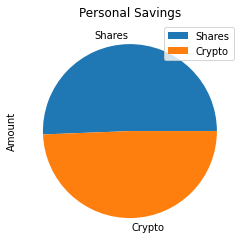

In [104]:
# Plot savings pie chart
savings_df.plot.pie(y="Amount", title= "Personal Savings")

In [105]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = savings_df.sum()
total_savings = total_savings["Amount"]
savings_goal = total_savings - emergency_fund

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund")
elif total_savings == emergency_fund:
    print("Congratulations on reaching your financial goal!")
else: 
    print(f"You are ${total_savings-emergency_fund} from reaching your goal")

Congratulations! You have enough money in your emergency fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [106]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [107]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 1000
).df.dropna()

# Display sample data
df_stock_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   
2017-05-17 00:00:00-04:00  109.35  109.600  109.2800  109.560  2263851.0   

                              SPY                                        
                             open    high     low    close       volume  
time                                                                     
2017-05-11 00:00:00-04:00  239.35  239.57  238.13  239.410   45435690.0  
2017-05-12 00:00:00-04:00  239.09  239.21  238.67  239.030   35283567.0  
2017-05-15 00:00:00-04:00  239.47  240.44  239.45  240.245   42230620.0  
2017-05-16 00:00:00-04:00  240.62  240.67  239.63  240.100   37206183.0  
2017-05-17 00:00:00-04:00  238.10  238.64  235.75  235.850  118613594.0

In [108]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_forecast = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = 500,
    num_trading_days = 252*30
)

In [109]:
# Printing the simulation input data
MC_forecast.portfolio_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   
2017-05-17 00:00:00-04:00  109.35  109.600  109.2800  109.560  2263851.0   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-11 00:00:00-04:00          NaN  239.35  239.57  238.13  239.410   
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   
2017-05-17 00:00:00-04:00     0.005138  238.10  238.64  235.75  235.850   

                                                     
                                volume daily_return  
time                                                 
2017-05-11 00:00:00-04:00   45435690.0          NaN  
2017-05-12 00:00:00-04:00   35283567.0    -0.001587  
2017-05-15 00:00:00-04:00   42230620.0     0.005083  
2017-05-16 00:00:00-04:00   37206183.0    -0.000604  
2017-05-17 00:00:00-04:00  118613594.0    -0.017701

In [110]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_forecast.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Dana0\FinancialPlanning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995167,1.001431,1.004680,0.999281,0.998278,0.994471,1.009749,0.997623,0.998570,0.996229,...,0.987151,0.998879,1.005212,0.995141,1.008895,1.008768,0.993000,1.002563,0.995461,1.009687
2,1.012575,1.008104,0.995728,1.010809,0.999897,0.985123,1.017556,0.991463,0.998315,0.989348,...,0.989309,0.993161,1.020005,0.994546,1.013051,1.016795,0.999222,1.001164,1.000786,1.005941
3,1.015178,0.998644,0.997173,1.012857,1.001338,0.981122,1.022045,0.993945,1.010026,0.976527,...,0.995737,0.985453,1.025162,0.993231,1.011885,1.016988,1.003695,0.998442,1.006581,1.008314
4,1.015253,1.001879,1.007654,1.024365,1.011070,0.980860,1.026230,0.997161,1.032836,0.977554,...,0.994747,0.983453,1.013704,0.990968,1.020960,1.015192,1.009057,1.008970,1.011285,1.018234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,23.580589,7.877059,8.328493,19.051944,12.670494,3.346655,48.610298,7.406356,15.294076,21.455109,...,24.504320,7.357067,13.237331,18.872100,10.650502,10.666468,4.389432,4.262381,26.223694,4.250797
7557,23.613704,7.884799,8.444723,19.193235,12.704211,3.348916,48.179051,7.350751,15.110131,21.408968,...,24.276277,7.336795,13.255022,18.749346,10.625020,10.615163,4.392494,4.322851,26.201217,4.232096
7558,23.757460,7.974231,8.366019,19.301612,12.793621,3.351552,48.369613,7.308049,15.201291,21.169731,...,24.658390,7.341145,13.183975,18.868602,10.671657,10.704480,4.344044,4.339974,26.142883,4.258018
7559,23.656008,7.934050,8.329876,19.326906,12.776100,3.417957,48.530184,7.250824,15.347830,21.144667,...,24.489803,7.305127,13.261243,18.841801,10.681410,10.798257,4.372513,4.289763,25.817455,4.244496


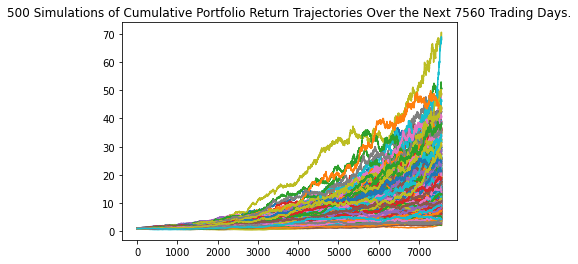

In [111]:
# Plot simulation outcomes
plot = MC_forecast.plot_simulation()

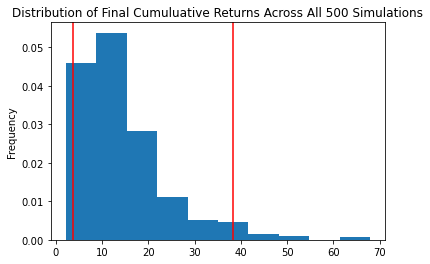

In [112]:
# Plot probability distribution and confidence intervals
plot = MC_forecast.plot_distribution()

### Retirement Analysis

In [113]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats = MC_forecast.summarize_cumulative_return()

# Print summary statistics
print(summary_stats)

count           500.000000
mean             14.531619
std               9.396797
min               2.163969
25%               8.014798
50%              12.205737
75%              17.678642
max              67.963632
95% CI Lower      3.820766
95% CI Upper     38.398826
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [114]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary_stats[8]*initial_investment,2)
ci_upper = round(summary_stats[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $76415.32 and $767976.52


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [115]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(summary_stats[8]*initial_investment*1.5,2)
ci_upper = round(summary_stats[9]*initial_investment*1.5,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $171934.47 and $1727947.18


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [116]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_forecast5 = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = 500,
    num_trading_days = 252*5
)

In [117]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_forecast5.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Dana0\FinancialPlanning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004526,0.994303,0.997148,1.005434,1.004562,1.004487,0.992527,1.002823,0.994395,1.001544,...,0.994718,0.990694,1.004482,1.000084,1.000424,1.006896,0.990342,1.000535,1.004490,1.001524
2,1.000054,1.004478,1.000451,1.003348,1.004894,1.008530,0.990274,1.007688,0.991854,1.003828,...,0.999979,0.991718,1.016824,1.002984,1.004451,1.008285,0.989049,0.995704,1.013203,1.003572
3,0.992597,1.003834,1.005354,0.992239,1.011079,1.013406,1.000927,0.995378,0.993772,1.008150,...,1.011412,0.985020,1.018098,1.004770,1.002183,1.014479,0.979205,0.985474,1.018879,1.004850
4,0.996479,0.995023,1.007643,0.995346,1.017310,1.008708,1.010679,0.999016,0.993674,1.002924,...,1.000087,0.986347,1.011966,1.009412,1.006040,1.010645,0.970142,0.972951,1.024783,0.994848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.872373,1.391602,1.551366,1.655502,1.348090,1.302797,1.412171,2.076029,1.249302,1.122258,...,1.508574,1.183839,1.216914,1.616028,2.446213,1.860364,1.329489,1.258720,1.001601,1.604479
1257,1.877521,1.404326,1.571304,1.662069,1.355185,1.306735,1.414141,2.093634,1.245432,1.116162,...,1.508749,1.173336,1.210457,1.620008,2.459694,1.848258,1.334522,1.259484,1.007130,1.612356
1258,1.870649,1.393710,1.560546,1.661853,1.361407,1.300335,1.424591,2.116219,1.249096,1.105385,...,1.520472,1.167731,1.208716,1.623176,2.452727,1.858815,1.354201,1.268181,1.005262,1.617076
1259,1.863190,1.402091,1.552310,1.663225,1.372194,1.295591,1.417140,2.112100,1.248309,1.102880,...,1.520020,1.173394,1.213580,1.630821,2.452163,1.852591,1.355688,1.271288,1.005640,1.609495


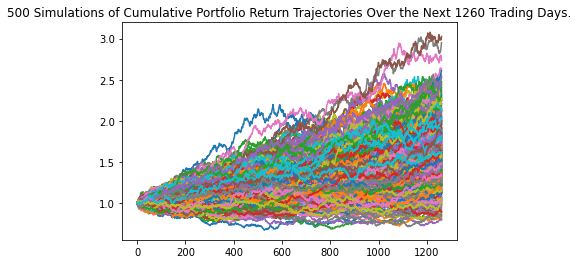

In [118]:
# Plot simulation outcomes
plot5 = MC_forecast5.plot_simulation()

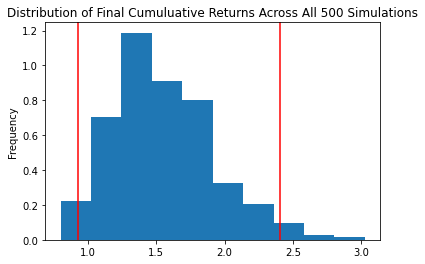

In [119]:
# Plot probability distribution and confidence intervals
plot5 = MC_forecast5.plot_distribution()

In [120]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats5 = MC_forecast5.summarize_cumulative_return()

# Print summary statistics
print(summary_stats5)

count           500.000000
mean              1.553874
std               0.375774
min               0.801898
25%               1.283816
50%               1.495432
75%               1.797238
max               3.025386
95% CI Lower      0.931110
95% CI Upper      2.404024
Name: 1260, dtype: float64


In [121]:
# Set initial investment
initial_investment = 10000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(five_year_port[8]*initial_investment,2)
ci_upper_five = round(five_year_port[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $10000 in the portfolio over the next 5 years will end within in the range of $9561.91 and $23618.12


### Ten Years Retirement Option

In [122]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_forecast10 = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = 500,
    num_trading_days = 252*10
)

In [123]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_forecast10.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Dana0\FinancialPlanning\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993500,1.005932,1.001484,1.006703,1.006604,1.005981,1.006109,0.994917,1.000155,0.995533,...,1.001274,1.009983,1.005376,0.989262,1.001096,1.001333,1.010772,0.997435,0.992532,1.006662
2,0.997577,1.004058,1.010017,1.021024,0.999557,1.007420,1.016237,1.003580,1.002906,0.997569,...,0.994979,1.018470,1.010709,0.989457,0.998264,1.009134,1.000481,0.987561,0.992957,1.015184
3,0.996087,1.006346,1.008549,1.010286,0.983655,0.997932,1.013085,1.005719,1.013073,1.008920,...,0.989601,1.014513,1.001698,0.984761,1.001520,1.024993,1.003602,0.980475,0.992491,1.020196
4,0.994042,1.011071,1.009964,1.011562,0.975206,1.007002,1.002957,0.999903,1.014113,1.005924,...,0.992902,1.030867,0.996836,0.982821,0.996725,1.030813,1.000736,0.985058,0.996517,1.022839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.314378,1.355614,1.527256,3.509117,1.593576,1.213438,1.847376,2.496820,2.935645,1.827429,...,2.916890,2.731660,1.856216,3.405714,2.304374,2.615200,1.854026,1.937591,1.843737,1.335187
2517,2.336347,1.355224,1.517996,3.485797,1.589834,1.214731,1.850604,2.488747,2.915101,1.832760,...,2.927058,2.737598,1.881532,3.423247,2.274734,2.625454,1.858688,1.950487,1.824751,1.358403
2518,2.321972,1.353042,1.520575,3.493109,1.602083,1.218457,1.853526,2.506647,2.899953,1.847210,...,2.922869,2.757746,1.865145,3.429626,2.282870,2.601561,1.868694,1.944956,1.812046,1.355141
2519,2.342350,1.348457,1.509687,3.540942,1.612363,1.226972,1.850038,2.532734,2.903610,1.853829,...,2.898060,2.752821,1.863675,3.426602,2.291846,2.575801,1.870857,1.947683,1.814667,1.353277


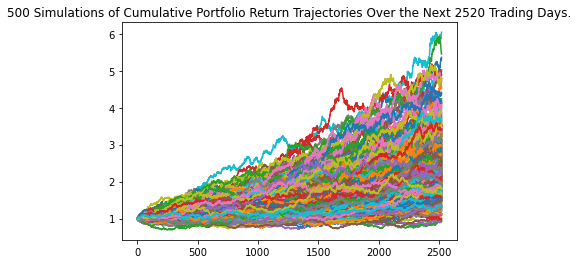

In [124]:
# Plot simulation outcomes
plot10 = MC_forecast10.plot_simulation()

In [125]:
# Plot probability distribution and confidence intervals
plot10 = MC_forecast10.plot_distribution

In [126]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats10 = MC_forecast10.summarize_cumulative_return()

# Print summary statistics
print(summary_stats10)

count           500.000000
mean              2.419417
std               0.827014
min               0.922543
25%               1.846582
50%               2.281249
75%               2.884369
max               6.040204
95% CI Lower      1.133709
95% CI Upper      4.317978
Name: 2520, dtype: float64


In [127]:
# Set initial investment
initial_investment = 30000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(summary_stats10[8]*initial_investment,2)
ci_upper_ten = round(summary_stats10[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $30000 in the portfolio over the next 10 years will end within in the range of $34011.27 and $129539.34
